In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Step 1: Load data**
    
Two sets of data (.json and .csv) were obtained from Twint search 

In [2]:
#
# Read in data from the two searches
#
search_1 = pd.read_json('storm4.json',lines=True)
search_2 = pd.read_csv('newsearch.csv')
#

Both data is now merged

In [3]:
#
# Merge both data together
#
merge = [search_1,search_2]
data = pd.concat(merge)
#

In [4]:
#
# Check dimension of data
#
print(f"Data has {data.shape[0]} tweets over {data.shape[1]} attributes")
#

Data has 113592 tweets over 34 attributes


**Step 2: Remove empty and unnecessary variables**   
    
The downloaded data has many un-needed and null variables 

In [5]:
#
# Check data headers
#
data.columns
#

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [6]:
#
# Extract out only needed variables
#
data_1 = data[["username", "tweet", "date","urls","photos","video","hashtags","place","link","video"]].copy()
#

In [7]:
#
# Recode tweet and hashtag as string
#
data_1['tweet']=data_1['tweet'].apply(str)
#
data_1['hashtags']=data_1['hashtags'].apply(str)
#

**Step 3: Data filtering 1**  
    
For the first filtering step, only tweets that matches a given "search values" is returned.

In [8]:
#
# Print data dimension before filtering
#
print(f"Total number of tweet before filter is: {data_1.shape[0]}")
#
# Specify the search values
#
search_values = ['landslip','landslide','erosion','mudslip', 'cliff', 'rockfall', 'mudslide',
                'mudslip','landfall', 'earthslip','earthslide','erosion']
#
# Run the filtering
#
data_2 = data_1[data_1.tweet.str.lower().str.contains('|'.join(search_values))]
#
# Print data dimension after filtering
#
print(f"Total number of tweet after filter is: {data_2.shape[0]}")
#

Total number of tweet before filter is: 113592
Total number of tweet after filter is: 1570


**Step 3: Data filtering 2**
    
The output from filtering above contain only tweets with words such as landslide, landslip, etc, that is words passed in the "search_values". However
several of those tweets are still referring to something else. For example, landslide could be in reference to election victory. Here, we want to 
filter out those tweets. 
To do that, a wordcloud of the tweets is generated to identify frequent words. The idea is to identify words that would not be in a tweet reporting on landslide events. For example,
words like "politics", or "Brexit", or "victory" would not be in a tweet reporting a landslide event. So we identify those "unrelated keywords" and remove all tweets containg
the "unrelated keywords".

In [8]:
#
# Load library for wordcloud
#
from wordcloud import WordCloud, STOPWORDS
#

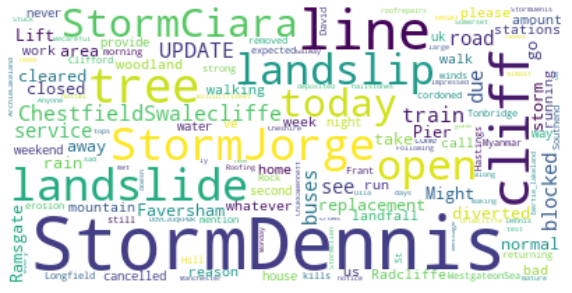

In [17]:
#
# Combine all words in the tweet into text
#
text = " ".join(review for review in data_3.tweet)
#
# Load a pre-defined ste of stopwords which are not required (e.g is, the)
#
stopwords = set(STOPWORDS)
#
# Generate wordcloud
#
wordcloud = WordCloud(stopwords=stopwords, background_color="white", random_state=21).generate(text)
#
# Display image
#
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#

Viewing the wordcloud, some words are dominant but are required. E.g. we are not interested in words like landlide, stormDennis, etc
So we include those word into the stopwords and generate a new point cloud

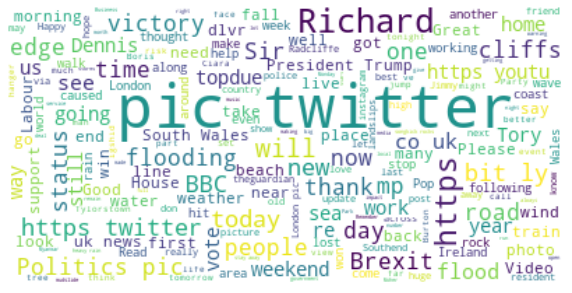

In [13]:
#
# Update stopwords
#
stopwords.update(["stormDennis", "StormCiara", "StormJorge", "Storm Dennis", "StormDennis","landslide", 
                  "landslip", "storm","erosion","Cliff","cliff","landslides"])
#
# Create new wordcloud
#
wordcloud = WordCloud(stopwords=stopwords, background_color="white", random_state=21).generate(text)
#
# Display image
#
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above process is done repeatedly until we have the identified all possible "unrelated keywords" which is then used to filter the data.

In [16]:
#
# Print data dimension before filtering
#
print(f"Total number of tweet before filter is: {data_2.shape[0]}")
#
# Specify the unrelated keywords
#
unrelated_keywords = ['now','richard','brexit','labour','victory','vote','tory','london','people','election','politics'
                ,'ireland','brexit','president','boris','johnson','politics','election', 'tory', 'winning', 'victory',
                'trump','party', 'london','british','political', 'won','labour','people', 'music','album','classic'
                ,'market','concerts','song','deal','no deal','flood','flooding','flooded','Rishi Sunak'
                ,'polls','happy', 'revolutionary','HouseOfCommon','United States', 'https','twitter','weather',
                     'youtu',"will"]
#
# Run the filtering
#
data_3 = data_2[~data_2.tweet.str.lower().str.contains('|'.join(unrelated_keywords))]
#
# Print data dimension after filtering
#
print(f"Total number of tweet after filter is: {data_3.shape[0]}")
#

Total number of tweet before filter is: 1570
Total number of tweet after filter is: 39


In [18]:
#
# Preview output
#
data_3.head(20).tweet

16     Stunning photography at the #CliffsOfMoher dur...
137    Retweet @ CopernicusLand: RT DrGeoffSmith: In ...
140    In the aftermath of #StormDennis there was a d...
147    RT Fixflo "[Infographic] In a bid to understan...
148    [Infographic] In a bid to understand how storm...
207    RT Fixflo "[Infographic] In a bid to understan...
208    [Infographic] In a bid to understand how storm...
227    A local farmer friend has obtained pics of the...
250    On February 10th, #StormCiara’s 90mph winds an...
251    More than a month after #StormCiara the rail l...
289    We are loosing the #heritage 🥺. #LeckCastle lo...
351    Many Lake District rivers have been straighted...
403    #Framgrabs from a video 🎞 Well the never endin...
456    Following #StormCiara and Dennis, It seems tha...
472    Maintenance | Engineers fix West Coast Mainlin...
499    Works to carry out remedial works on a landsli...
554    [Infographic] In a bid to understand how storm...
797    My favourite beach in So